In [1]:
import ast
import pandas as pd
import numpy as np
from ast import literal_eval
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter("ignore")

In [2]:
movies = pd.read_csv("./dataset/movies_metadata.csv")
movies = movies[["id", "title", "genres"]]
movies = movies.rename(columns={"id": "movieId"})
movies.head()

,movieId,title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [3]:
movies["genres"] = (
    movies["genres"]
    .fillna("[]")
    .apply(literal_eval)
    .apply(lambda x: [i["name"] for i in x] if isinstance(x, list) else [])
)
movies.head()

,movieId,title,genres
0,862,Toy Story,"[Animation, Comedy, Family]"
1,8844,Jumanji,"[Adventure, Fantasy, Family]"
2,15602,Grumpier Old Men,"[Romance, Comedy]"
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]"
4,11862,Father of the Bride Part II,[Comedy]


In [4]:
ratings = pd.read_csv("./dataset/ratings_small.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
ratings_pivot = ratings.pivot(index="movieId", columns="userId", values="rating")
ratings_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ratings_pivot.fillna(0, inplace=True)
ratings_pivot.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
no_user_voted = ratings.groupby("movieId")["rating"].agg("count")
no_movies_voted = ratings.groupby("userId")["rating"].agg("count")

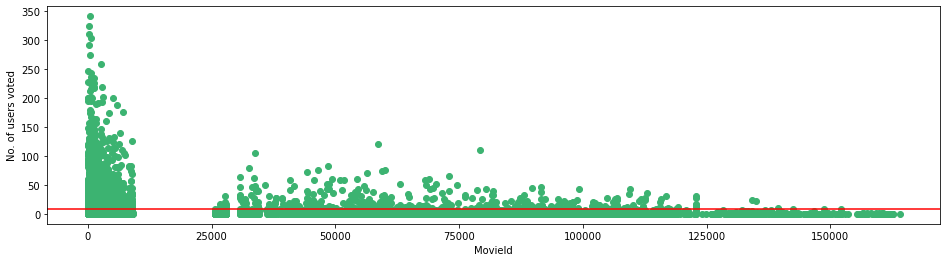

In [8]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index, no_user_voted, color="mediumseagreen")
plt.axhline(y=10, color="r")
plt.xlabel("MovieId")
plt.ylabel("No. of users voted")
plt.show()

In [9]:
final_ratings = ratings_pivot.loc[no_user_voted[no_user_voted > 0].index, :]

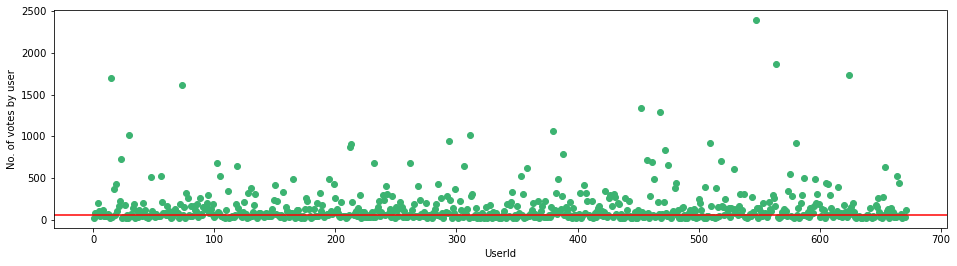

In [10]:
f, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.scatter(no_movies_voted.index, no_movies_voted, color="mediumseagreen")
plt.axhline(y=50, color="r")
plt.xlabel("UserId")
plt.ylabel("No. of votes by user")
plt.show()

In [11]:
# final_ratings = final_ratings.loc[:, no_movies_voted[no_movies_voted > 50].index]
final_ratings.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
csr_data = csr_matrix(final_ratings.values)
final_ratings.reset_index(inplace=True)

In [13]:
knn = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [14]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies["title"].str.contains(movie_name, na=False)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]["movieId"]
        movie_idx = final_ratings[final_ratings["movieId"] == int(movie_idx)].index[0]
        distances, indices = knn.kneighbors(
            csr_data[movie_idx], n_neighbors=n_movies_to_reccomend + 1
        )
        rec_movie_indices = sorted(
            list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())),
            key=lambda x: x[1],
        )[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_ratings.iloc[val[0]]["movieId"]
            idx = movies[movies["movieId"] == str(int(movie_idx))].index
            if movies.iloc[idx]["title"].values:
                recommend_frame.append(
                    {"Title": movies.iloc[idx]["title"], "Distance": val[1]}
                )
        df = pd.DataFrame(recommend_frame, index=range(1, min(len(recommend_frame), n_movies_to_reccomend) + 1))
        return df
    else:
        return "No movies found. Please check your input"

In [15]:
get_movie_recommendation("Memento")

,Title,Distance
1,"12953 In Bed Name: title, dtype: object",0.292893
2,"3859 Diamonds Are Forever Name: title, dtyp...",0.292893
3,"3900 Miss Congeniality Name: title, dtype: ...",0.292893
4,"2253 King Kong Name: title, dtype: object",0.292893
5,2289 Rambo: First Blood Part II Name: title...,0.019419
6,"6556 Party Monster Name: title, dtype: object",0.010051
